In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12
# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')
# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns
sns.set()
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [2]:
df = pd.read_csv('box_office_predictions.csv')

In [20]:
df2 = df

In [21]:
df2.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


In [38]:
#create new column called outcome to calculate the financial outcome of the movie
col = df2.apply(lambda row: row.gross - row.budget, axis=1)
df2 = df2.assign(outcome=col.values)

In [39]:
df2.head()

,budget,country,director,genre,gross,name,...,score,star,studio,votes,year,outcome
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar,...,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,2009,523507625.0
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic,...,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,1997,458672302.0
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,...,7.0,Chris Pratt,Universal Pictures,470625,2015,502270625.0
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers,...,8.1,Robert Downey Jr.,Marvel Studios,1069292,2012,403357910.0
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight,...,9.0,Christian Bale,Warner Bros.,1845853,2008,349858444.0


In [26]:


#create a new col1 list from name column and remove non numeric objects
col1 = df2['name'].str.extract('(\d+)', expand=False)
#add new column called year from col1
df2 = df2.assign(year=col1.values)


In [41]:
df2.head()

,budget,country,director,genre,gross,name,...,score,star,studio,votes,year,outcome
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar,...,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,2009,523507625.0
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic,...,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,1997,458672302.0
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,...,7.0,Chris Pratt,Universal Pictures,470625,2015,502270625.0
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers,...,8.1,Robert Downey Jr.,Marvel Studios,1069292,2012,403357910.0
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight,...,9.0,Christian Bale,Warner Bros.,1845853,2008,349858444.0


In [42]:
df3 = df2

In [43]:
#strip characters in  values from name
df3['name'] = df3['name'].str.replace('\([^)]*\)', '')

In [44]:
df3.head()

,budget,country,director,genre,gross,name,...,score,star,studio,votes,year,outcome
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar,...,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,2009,523507625.0
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic,...,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,1997,458672302.0
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,...,7.0,Chris Pratt,Universal Pictures,470625,2015,502270625.0
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers,...,8.1,Robert Downey Jr.,Marvel Studios,1069292,2012,403357910.0
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight,...,9.0,Christian Bale,Warner Bros.,1845853,2008,349858444.0


In [49]:
df3.columns

Index(['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
       'runtime', 'score', 'star', 'studio', 'votes', 'year', 'outcome'],
      dtype='object')

In [54]:
df3.describe()


,budget,gross,runtime,score,votes,outcome
count,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03
mean,2.469918e+07,3.341635e+07,106.587000,6.386383,7.188537e+04,8.717169e+06
std,3.721710e+07,5.735205e+07,18.026885,0.994921,1.308033e+05,4.017804e+07
min,0.000000e+00,4.410000e+02,50.000000,1.500000,2.700000e+01,-1.769219e+08
25%,0.000000e+00,1.527796e+06,95.000000,5.800000,7.791750e+03,-5.121963e+06
50%,1.100000e+07,1.229897e+07,102.000000,6.500000,2.660150e+04,9.602125e+05
75%,3.262500e+07,4.007256e+07,115.000000,7.100000,7.677475e+04,1.401508e+07
max,3.000000e+08,7.605076e+08,366.000000,9.300000,1.868308e+06,5.235076e+08


In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
budget      6000 non-null float64
country     6000 non-null object
director    6000 non-null object
genre       6000 non-null object
gross       6000 non-null float64
name        6000 non-null object
rating      6000 non-null object
runtime     6000 non-null int64
score       6000 non-null float64
star        6000 non-null object
studio      6000 non-null object
votes       6000 non-null int64
year        6000 non-null object
outcome     6000 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 656.3+ KB


In [57]:
df3.head()

,budget,country,director,genre,gross,name,...,score,star,studio,votes,year,outcome
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar,...,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,2009,523507625.0
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic,...,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,1997,458672302.0
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,...,7.0,Chris Pratt,Universal Pictures,470625,2015,502270625.0
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers,...,8.1,Robert Downey Jr.,Marvel Studios,1069292,2012,403357910.0
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight,...,9.0,Christian Bale,Warner Bros.,1845853,2008,349858444.0


In [75]:
#convert year to int
df3["year"] = df3.year.astype(int)

In [76]:
df3.head()

,budget,country,director,genre,gross,name,...,score,star,studio,votes,year,outcome
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar,...,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,2009,523507625.0
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic,...,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,1997,458672302.0
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,...,7.0,Chris Pratt,Universal Pictures,470625,2015,502270625.0
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers,...,8.1,Robert Downey Jr.,Marvel Studios,1069292,2012,403357910.0
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight,...,9.0,Christian Bale,Warner Bros.,1845853,2008,349858444.0


In [92]:
df3.shape

(6000, 14)

In [93]:
#films b4 2014
df14 = df3[df3['year'] <= 2014]

In [94]:
df14.shape

(5634, 14)

In [95]:
#films after 2014
dfgt14 = df3[df3['year'] >= 2014]

In [96]:
dfgt14.shape

(544, 14)

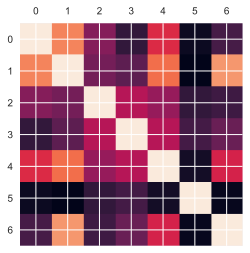

In [79]:
plt.matshow(df3.corr());

In [82]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient()

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


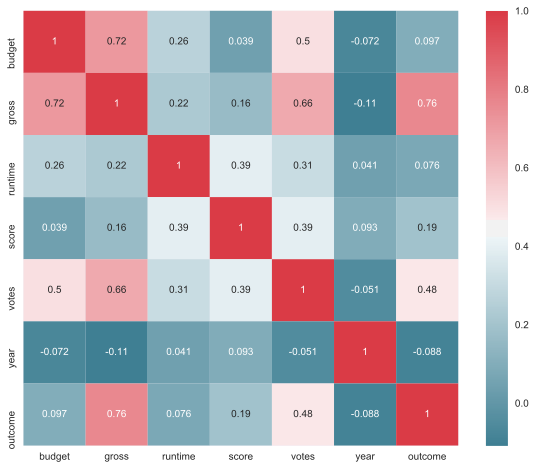

In [90]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True);

In [97]:
df14.head()

,budget,country,director,genre,gross,name,...,score,star,studio,votes,year,outcome
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar,...,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,2009,523507625.0
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic,...,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,1997,458672302.0
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers,...,8.1,Robert Downey Jr.,Marvel Studios,1069292,2012,403357910.0
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight,...,9.0,Christian Bale,Warner Bros.,1845853,2008,349858444.0
6,115000000.0,USA,George Lucas,Action,474544677.0,Star Wars: Episode I - The Phantom Menace,...,6.5,Ewan McGregor,Lucasfilm,587113,1999,359544677.0


In [98]:
features = ['budget', 'country', 'director', 'genre', 'star', 'studio', 'year']
X = df14[features]
y = df14['gross']

In [103]:
y

0       760507625.0
1       658672302.0
3       623357910.0
4       534858444.0
6       474544677.0
8       448139099.0
9       436471036.0
10      424668047.0
11      423315812.0
12      415004880.0
13      409013994.0
15      408010692.0
16      403706375.0
17      402453882.0
18      402111870.0
19      400738009.0
20      381011219.0
21      380843261.0
22      380262555.0
23      373585825.0
24      370782930.0
25      368061265.0
29      353007020.0
30      352390543.0
31      350126372.0
33      337135885.0
34      336530303.0
36      334191110.0
37      333176600.0
39      330252182.0
           ...     
5969         2964.0
5970         2959.0
5971         2760.0
5972         2670.0
5973         2623.0
5974         2567.0
5975         2554.0
5976         2550.0
5977         2483.0
5978         2303.0
5980         2137.0
5981         2034.0
5982         1960.0
5983         1887.0
5984         1849.0
5985         1841.0
5986         1808.0
5987         1800.0
5988         1785.0


In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df14.gross, random_state=0)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [104]:
X_train

NameError: name 'X_train' is not defined

In [105]:
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

ValueError: could not convert string to float: 'Cinetel Films'